K Means Clustering 

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# Data
total_people = 1000

x_1 = np.random.normal(10, 10, int(total_people/2))
y_1 = np.random.normal(100, 10, int(total_people/2))

x_2 = np.random.normal(20, 10, int(total_people/2))
y_2 = np.random.normal(200, 10, int(total_people/2))

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

# Take absolute values on x and y
x = np.abs(x)
y = np.abs(y)

# x = np.array([10, 12, 13, 11, 10, 10])
# y = np.array([110, 170, 150, 120, 120, 130])



Text(0, 0.5, 'Average Heart Rate')

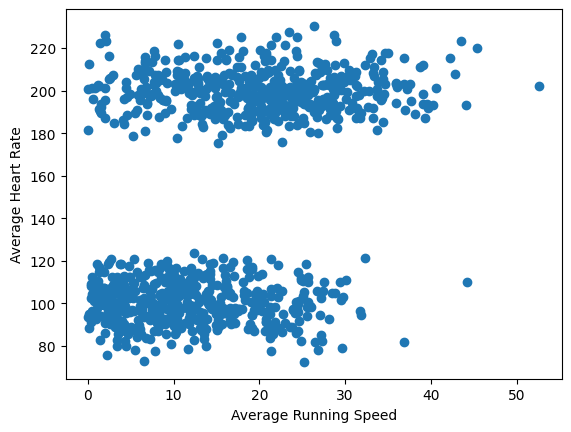

In [115]:
# Plot Data
plt.scatter(x, y)

# X label
plt.xlabel('Average Running Speed')

# Y label
plt.ylabel('Average Heart Rate')

In [116]:
#Find people who are in the same fitness category
#Sort 10,000 people into K groups
#Make 2 groups (Fit & Not Fit)
#Group together high running speed and high heart rate
#Group together low heart rate and low running speed

#create distance function
def dist_func(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Euclidean Distance Fomula
Euclidan distance = $ \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2} $

In [117]:
def kmeans_clustering(x, y, k, max_iter=100):
    # Initialize centroids randomly
	centroids_x = np.random.randint(np.min(x), np.max(x), size=k)
	centroids_y = np.random.randint(np.min(y), np.max(y), size=k)
	centroids = np.array(list(zip(centroids_x, centroids_y)), dtype=np.float32)

	# Initialize clusters
	clusters = np.zeros(len(x))

	for _ in range(max_iter):
		# Assign each point to the closest centroid
		for i in range(len(x)):
			distances = dist_func(x[i], y[i], centroids[:, 0], centroids[:, 1])
			cluster = np.argmin(distances)
			clusters[i] = cluster

		# Update centroids
		for i in range(k):
			points = [x[j] for j in range(len(x)) if clusters[j] == i]
			centroids[i] = np.mean(points, axis=0)

	return centroids, clusters

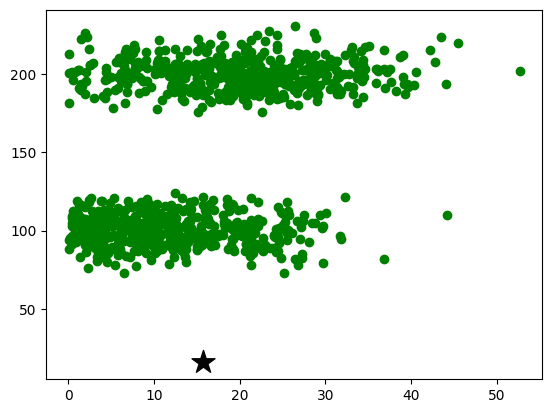

In [120]:
centroids, clusters = kmeans_clustering(x, y, k=2, max_iter=100)

#print(centroids)
#print(clusters)

# Plot data and centroids
colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig, ax = plt.subplots()
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colors[int(clusters[i])])
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='#050505')